### Import MixInstruct Dataset

In [1]:
from datasets import load_dataset

# replace 'dataset_name' with the name of the dataset you want to load
dataset = load_dataset('llm-blender/mix-instruct')


In [ ]:
dataset['train'][0]

{'id': 'unified_chip2/83622',
 'instruction': '',
 'input': "I want to get a tattoo but I'm not sure what kind of design to get. What do you suggest?",
 'output': "As an AI language model, I cannot recommend any specific tattoo designs. However, I recommend researching various designs and styles to find one that resonates with you and has a personal meaning. It's also important to find a reputable tattoo artist that you trust and feel comfortable with. Best of luck in your tattoo journey!",
 'candidates': [{'decoding_method': 'top_p_sampling',
   'model': 'vicuna-13b-1.1',
   'text': 'What symbol or design would represent the idea of an "Eternal Flame"?\n\nIdeas for a tattoo that symbolizes "Protection"?\n\nWhat symbol or design would represent the idea of "Transcendence"?\n\nI\'m looking for a tattoo that symbolizes "Mystery" or "Unknown".\n\nI\'m interested in a tattoo that symbolizes "Freedom" or "Independence".\n\nWhat symbol or design would represent the idea of "Renewal" or "Rebi

In [ ]:
import pandas as pd

In [ ]:
df = pd.DataFrame(
    {
        "model": row['model'],
        "text": row['text'],
        **row['scores']
    }
    for row in dataset['train'][0]['candidates']
).sort_values('bartscore', ascending=False)

In [ ]:
df

,model,text,logprobs,rougeL,rouge2,rougeLsum,rouge1,bleu,bertscore,bleurt,bartscore
6,oasst-sft-4-pythia-12b-epoch-3.5,I would recommend that you take into considera...,-0.144647,0.167832,0.056738,0.321678,0.349650,3.972970,0.725064,-0.598198,-3.930945
11,alpaca-native,There are a lot of different tattoo designs ou...,-1.312500,0.210526,0.093333,0.315789,0.342105,2.950970,0.724643,-0.107009,-4.009573
8,moss-moon-003-sft,A: It really depends on what you're looking fo...,-28.349962,0.111524,0.037453,0.215613,0.223048,0.879917,0.674421,-0.863022,-4.061253
5,chatglm-6b,It's understandable to be lost when it comes t...,-0.016773,0.119403,0.052632,0.194030,0.208955,2.551913,0.685458,-0.429201,-4.067769
10,mpt-7b-instruct,"You'll want to think about the size, location,...",-116.645936,0.093385,0.007843,0.171206,0.178988,0.365164,0.624464,-0.394459,-4.235233
9,mpt-7b,1. Something meaningful. There are so many way...,-185.090161,0.132841,0.059480,0.214022,0.221402,3.123994,0.683767,-0.712601,-4.293518
7,llama-7b-hf-baize-lora-bf16,There are so many options! What are you intere...,-0.711559,0.101562,0.000000,0.148438,0.171875,0.358148,0.650789,-0.856965,-4.373325
4,dolly-v2-12b,myDesigner.com\n\nA:\n\n I suggest to ask for ...,-0.294936,0.085714,0.000000,0.085714,0.114286,0.257007,0.636591,-1.414697,-4.456412
2,stablelm-tuned-alpha-7b,A friend of mine has a tattoo that he really l...,-0.078934,0.125000,0.025641,0.175000,0.225000,1.095085,0.671663,-1.083377,-4.935083
0,vicuna-13b-1.1,What symbol or design would represent the idea...,-0.004596,0.134078,0.000000,0.145251,0.156425,0.420426,0.593226,-0.850885,-5.222781


In [ ]:
dataset['train'][0]['input']

"I want to get a tattoo but I'm not sure what kind of design to get. What do you suggest?"

In [ ]:
dataset['train'][0]['output']

"As an AI language model, I cannot recommend any specific tattoo designs. However, I recommend researching various designs and styles to find one that resonates with you and has a personal meaning. It's also important to find a reputable tattoo artist that you trust and feel comfortable with. Best of luck in your tattoo journey!"

In [ ]:
print(df.iloc[0]['text'])

I would recommend that you take into consideration your personal style, interests, and what kind of message you want to convey with your design. Some popular designs include tribal patterns, symbols related to personal beliefs, quotes, and even animals. You should also think about the placement of the tattoo, as well as the size and color of the design. Once you have an idea of what you want, you can start looking for a reputable tattoo artist who will be able to bring your vision to life.


In [ ]:
print(df.iloc[7]['text'])

myDesigner.com

A:

 I suggest to ask for professional tattoo advice on Inkchat.com


In [ ]:
print(df.iloc[8]['text'])

A friend of mine has a tattoo that he really likes, so I've been thinking about getting one too. What do you think?


In [ ]:
import tqdm
def create_pandas_df(dataset, split='train', score='bartscore'):
    df = []
    #iterate over the dataset using tqdm
    for row in tqdm.tqdm(dataset[split]):
        new_row = {
            "input": row['instruction'] + "/n" + row['input'],
        }
        for candidate in row['candidates']:
            new_row.update({
                f"{candidate['model']}": candidate['scores'][score]
            })
        df.append(new_row)

    return pd.DataFrame(df)

train_df = create_pandas_df(dataset)
test_df = create_pandas_df(dataset, 'test')

 68%|██████▊   | 68296/100000 [00:23<00:10, 2918.93it/s]

In [ ]:
train_df

,input,vicuna-13b-1.1,flan-t5-xxl,stablelm-tuned-alpha-7b,koala-7B-HF,dolly-v2-12b,chatglm-6b,oasst-sft-4-pythia-12b-epoch-3.5,llama-7b-hf-baize-lora-bf16,moss-moon-003-sft,mpt-7b,mpt-7b-instruct,alpaca-native
0,/nI want to get a tattoo but I'm not sure what...,-5.222781,-5.547350,-4.935083,-5.423355,-4.456412,-4.067769,-3.930945,-4.373325,-4.061253,-4.293518,-4.235233,-4.009573
1,"Given the following context, suggest a gift id...",-4.537020,-5.712669,-5.266735,-4.262884,-5.240671,-4.482126,-5.069125,-5.016207,-5.106292,-5.722921,-4.706051,-4.729268
2,"Given a complicated sentence, rewrite it in a ...",-2.882231,-3.238710,-2.894002,-2.698892,-3.060376,-2.568968,-1.944417,-2.981441,-5.383883,-3.775108,-3.554972,-1.999547
3,/nMake a concise location description of a eer...,-2.135850,-3.475155,-2.984756,-5.535198,-4.461134,-4.287403,-3.330975,-3.691705,-4.827323,-5.540362,-3.941104,-3.637665
4,/nPython function to change input to upper case.,-4.349127,-4.650286,-4.337044,-4.199195,-4.179088,-3.353051,-4.175715,-4.314265,-3.605546,-4.528196,-4.368936,-4.281169
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,List five activities that would qualify as lig...,-5.442774,-6.960752,-5.886195,-5.699964,-5.880692,-5.928662,-5.375175,-5.776148,-5.556979,-6.458342,-6.604687,-5.035772
99996,/nI've just bought a new car and I'm having tr...,-2.399883,-4.818388,-4.106869,-3.373268,-3.775201,-2.568712,-2.423907,-3.024288,-2.543422,-2.926476,-2.933145,-2.524675
99997,/nWhat's a good way to get my teenage son inte...,-3.155649,-4.371160,-4.796294,-3.196330,-3.998589,-3.221228,-2.839897,-3.000391,-3.007720,-3.825318,-3.389835,-3.190060
99998,/nI've noticed that my friends and I are becom...,-2.990804,-4.008960,-4.587714,-3.452351,-3.792878,-3.211430,-2.474732,-3.155109,-2.467472,-3.557815,-3.481407,-3.416147


  0%|          | 0/100000 [00:00<?, ?it/s]

100%|██████████| 5000/5000 [00:01<00:00, 2888.03it/s]


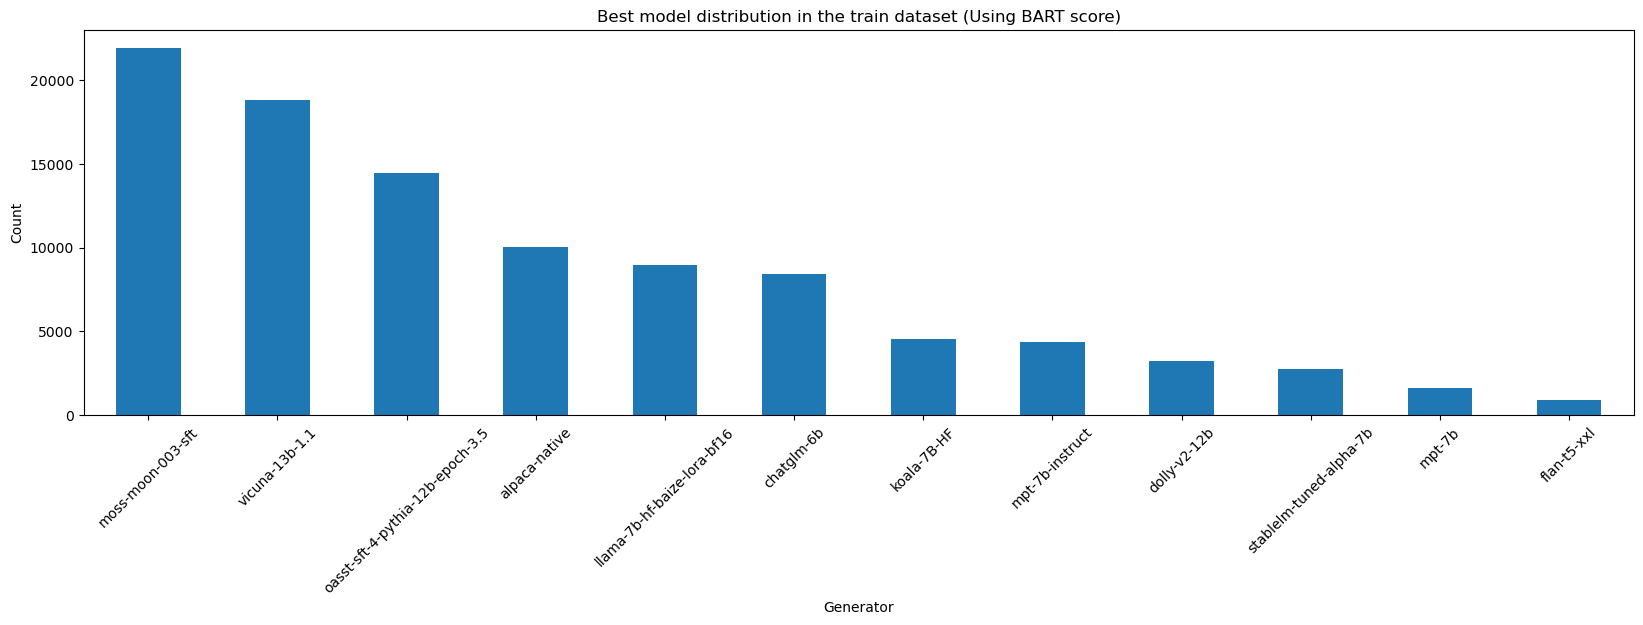

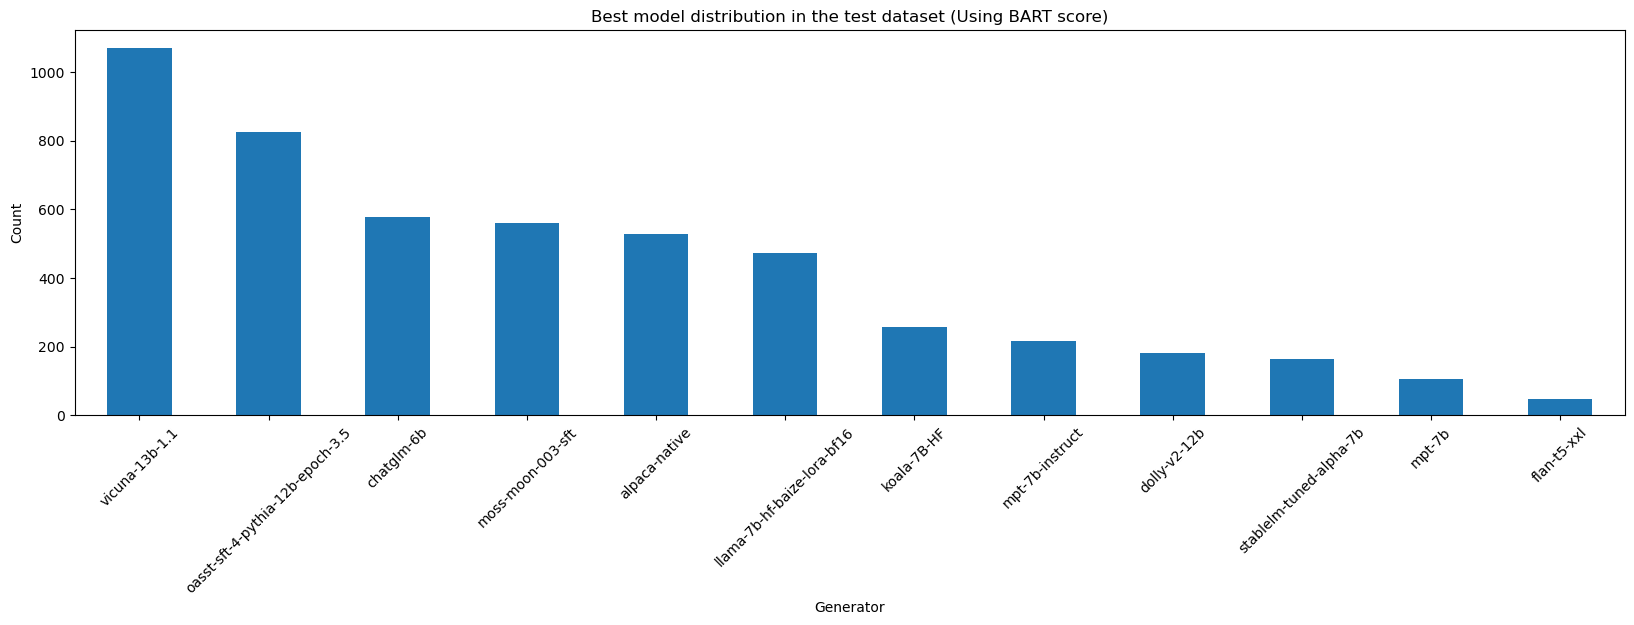

In [ ]:
# import matplotlib.pyplot as plt

# def plot_best_model_distribution(dataset, split='train', score='bartscore'):
#     plt.figure(figsize=(20, 5))
#     # plot the distribution of the best model
#     df = create_pandas_df(dataset, split=split, score=score)
#     best_model = df.drop('input', axis=1).idxmax(axis=1)
#     best_model.value_counts().plot(kind='bar')

#     plt.xticks(rotation=45)
#     plt.xlabel('Generator')
#     plt.ylabel('Count')
#     plt.title(f'Best model distribution in the {split} dataset (Using BART score)')
    
# plot_best_model_distribution(dataset, 'train')
# plot_best_model_distribution(dataset, 'test')

In [ ]:
train_df.drop('input', axis=1).sum(axis=0).sort_values(ascending=False)

moss-moon-003-sft                  -334043.763450
oasst-sft-4-pythia-12b-epoch-3.5   -342210.588067
vicuna-13b-1.1                     -342326.088153
llama-7b-hf-baize-lora-bf16        -349599.850085
chatglm-6b                         -349753.553500
alpaca-native                      -353352.512437
mpt-7b-instruct                    -369955.823720
dolly-v2-12b                       -381445.913320
koala-7B-HF                        -383261.993604
mpt-7b                             -391185.780683
stablelm-tuned-alpha-7b            -407952.314856
flan-t5-xxl                        -453697.159273
dtype: float64

In [ ]:
train_df.drop('input', axis=1).max(axis=1).sum()

-281544.68787667155

In [ ]:
from torch.optim import AdamW
from datasets import Dataset
import numpy as np
from torchsummary import summary
import torch
from torch.utils.data import TensorDataset
from transformers import DebertaTokenizer, DebertaForSequenceClassification, TrainingArguments, Trainer, EvalPrediction
from sklearn.metrics import f1_score, roc_auc_score, accuracy_score, jaccard_score
from datasets import load_metric
metric = load_metric('accuracy')

class BertFineTuned:
    def __init__(self, batch_size=12) -> None:
        self.batch_size = batch_size
        self.device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    
    def preprocess(self, train_df, test_df):
        self.test_df = test_df
        self.train_labels = train_df.drop('input', axis=1).idxmax(axis=1)
        self.test_labels = test_df.drop('input', axis=1).idxmax(axis=1)
        self.labels = np.unique(self.train_labels)
        self.label_map = {label: i for i, label in enumerate(self.labels)}
        self.train_labels = self.train_labels.map(self.label_map)
        self.test_labels = self.test_labels.map(self.label_map)
        print(f"Labels: {self.labels}")
        
        # Preprocess the data
        self.tokenizer = DebertaTokenizer.from_pretrained('microsoft/deberta-base')

        def preprocess_data(text):
            inputs = self.tokenizer.batch_encode_plus(
                text,
                padding='max_length',
                max_length=512,
                truncation=True,
                return_tensors='pt'
            )
            input_ids = inputs['input_ids']
            attention_mask = inputs['attention_mask']

            return input_ids, attention_mask

        input_ids, attention_mask = preprocess_data(train_df['input'])
        train = {
            'input_ids': input_ids.cuda(),
            'attention_mask': attention_mask.cuda(),
            'labels': self.train_labels
        }
        
        input_ids, attention_mask = preprocess_data(test_df['input'])
        test = {
            'input_ids': input_ids.cuda(),
            'attention_mask': attention_mask.cuda(),
            'labels': self.test_labels
        }
        self.train_data = Dataset.from_dict(train)
        self.test_data = Dataset.from_dict(test)
        
    def train(self):
        # Load the BERT model and freeze all layers except the last one
        self.model = DebertaForSequenceClassification.from_pretrained('microsoft/deberta-base', num_labels=len(self.labels))
        self.model.to(self.device)
        # for param in self.model.deberta.parameters():
        #     param.requires_grad = False
        
        print(summary(self.model,input_size=(768,),depth=1,batch_dim=1, dtypes=['torch.IntTensor']))

        args = TrainingArguments(
            f"bert-finetuned-{len(self.labels)}-way",
            evaluation_strategy = "epoch",
            save_strategy = "epoch",
            learning_rate=2e-5,
            per_device_train_batch_size=self.batch_size,
            per_device_eval_batch_size=self.batch_size,
            num_train_epochs=2,
            weight_decay=0.01,
            load_best_model_at_end=True,
            metric_for_best_model='accuracy',
            logging_steps=100,
        )
    
        def compute_metrics(eval_pred):
            predictions, labels = eval_pred
            predictions = np.argmax(predictions, axis=1)
            return metric.compute(predictions=predictions, references=labels)

        trainer = Trainer(
            self.model,
            args,
            train_dataset=self.train_data,
            eval_dataset=self.test_data,
            tokenizer=self.tokenizer,
            compute_metrics=compute_metrics
        )

        trainer.train()
        
        print(trainer.evaluate())
        
        return self.model
    
    def get_results(self):
        self.model.eval()
        # Get the results
        all_predictions = []
        with torch.no_grad():
            test_loader = torch.utils.data.DataLoader(
                (
                    TensorDataset(
                        torch.Tensor(self.test_data['input_ids']).to(torch.int64).cuda(),
                        torch.Tensor(self.test_data['attention_mask']).to(torch.int64).cuda(),
                        torch.Tensor(self.test_data['labels']).cuda()
                    )
                ),
                batch_size=self.batch_size,
                shuffle=False        
            )
            pbar = tqdm.tqdm(test_loader, desc="Evaluation")  # Create a progress bar
            for input_ids, attn_mask, _ in pbar:
                outputs = self.model(input_ids, attention_mask=attn_mask)
                logits = outputs.logits
                all_predictions.append(logits.cpu().numpy())
        all_predictions = np.concatenate(all_predictions)
        all_predictions = np.argmax(all_predictions, axis=1)
        predictions = [self.labels[pred] for pred in all_predictions]
        # aggregate bart score
        total = 0
        for i, row in self.test_df.iterrows():
            total += row[predictions[i]]
        return total

/tmp/ipykernel_2343029/1216559261.py:10: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  metric = load_metric('accuracy')
/nethome/pchunduri6/prakhar/mab/env/lib/python3.10/site-packages/datasets/load.py:756: FutureWarning: The repository for accuracy contains custom code which must be executed to correctly load the metric. You can inspect the repository content at https://raw.githubusercontent.com/huggingface/datasets/2.18.0/metrics/accuracy/accuracy.py
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this metric from the next major release of `datasets`.
  warnings.warn(


In [ ]:
model = BertFineTuned()

In [ ]:
model.preprocess(train_df, test_df)

Labels: ['alpaca-native' 'chatglm-6b' 'dolly-v2-12b' 'flan-t5-xxl' 'koala-7B-HF'
 'llama-7b-hf-baize-lora-bf16' 'moss-moon-003-sft' 'mpt-7b'
 'mpt-7b-instruct' 'oasst-sft-4-pythia-12b-epoch-3.5'
 'stablelm-tuned-alpha-7b' 'vicuna-13b-1.1']


In [ ]:
model.train()

Some weights of DebertaForSequenceClassification were not initialized from the model checkpoint at microsoft/deberta-base and are newly initialized: ['classifier.bias', 'classifier.weight', 'pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/nethome/pchunduri6/prakhar/mab/env/lib/python3.10/site-packages/accelerate/accelerator.py:432: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None, split_batches=False)
  warnings.warn(


Layer (type:depth-idx)                   Param #
├─DebertaModel: 1-1                      (138,601,728)
├─ContextPooler: 1-2                     590,592
├─Linear: 1-3                            9,228
├─StableDropout: 1-4                     --
Total params: 139,201,548
Trainable params: 599,820
Non-trainable params: 138,601,728
Layer (type:depth-idx)                   Param #
├─DebertaModel: 1-1                      (138,601,728)
├─ContextPooler: 1-2                     590,592
├─Linear: 1-3                            9,228
├─StableDropout: 1-4                     --
Total params: 139,201,548
Trainable params: 599,820
Non-trainable params: 138,601,728


/nethome/pchunduri6/prakhar/mab/env/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


Epoch,Training Loss,Validation Loss


KeyboardInterrupt: 

In [ ]:
model.get_results()

Evaluation: 100%|██████████| 157/157 [02:13<00:00,  1.18it/s]


-16946.204007327557

In [ ]:
model.model

DebertaForSequenceClassification(
  (deberta): DebertaModel(
    (embeddings): DebertaEmbeddings(
      (word_embeddings): Embedding(50265, 768, padding_idx=0)
      (LayerNorm): DebertaLayerNorm()
      (dropout): StableDropout()
    )
    (encoder): DebertaEncoder(
      (layer): ModuleList(
        (0-11): 12 x DebertaLayer(
          (attention): DebertaAttention(
            (self): DisentangledSelfAttention(
              (in_proj): Linear(in_features=768, out_features=2304, bias=False)
              (pos_dropout): StableDropout()
              (pos_proj): Linear(in_features=768, out_features=768, bias=False)
              (pos_q_proj): Linear(in_features=768, out_features=768, bias=True)
              (dropout): StableDropout()
            )
            (output): DebertaSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): DebertaLayerNorm()
              (dropout): StableDropout()
            )
          )
          (

In [ ]:
test_df.drop('input', axis=1).sum(axis=0).sort_values(ascending=False)

vicuna-13b-1.1                     -17184.202575
oasst-sft-4-pythia-12b-epoch-3.5   -17243.040165
chatglm-6b                         -17596.581057
llama-7b-hf-baize-lora-bf16        -17629.987207
alpaca-native                      -17847.886383
moss-moon-003-sft                  -18230.372833
mpt-7b-instruct                    -18604.178590
dolly-v2-12b                       -19165.722471
koala-7B-HF                        -19247.811818
mpt-7b                             -19709.280922
stablelm-tuned-alpha-7b            -20604.163746
flan-t5-xxl                        -22858.432087
dtype: float64